# Text - AI - le

Description...

**The goal is to ...**

Description...

*Researchers*: Ludovica Schaerf, Federico Siciliano

## Preparation phase


1.   Installation from GitHub
2.   Connection to Google Drive
3.   Paths definition and imports

There are 2 possibilities for using this notebook:

*   Run locally

In this case we have 2 chances:

1.   Download through pip install from GitHub, then import it using import keyword and use it.
2.   Download the code locally from GitHub and from the notebook define the paths to these sources (code to be adjusted).

*   Run in Colab

1.   Download through pip install from GitHub, then import it using import keyword and use it (HERE).
2.    Download the code locally from GitHub into the src folder in Google Drive and from the notebook define the paths to these sources (code to be adjusted).





### Connection to Google Drive
The code is a Python snippet designed to connect Google Drive to a Google Colab notebook. It checks if connect_to_drive is set to True, and if so, it imports the necessary library and mounts Google Drive to the /content/gdrive directory using Google Colab's drive.mount() function. The user will be prompted to authorize the connection through a popup window.

In [1]:
# Set connect_to_drive to True if you want to connect to Google Drive.
connect_to_drive = False

# If connect_to_drive is True, connect to Google Drive using the google.colab library.
# This will prompt a popup window where you'll need to authorize access to your Google Drive.
if connect_to_drive:
    from google.colab import drive

    # Mount the Google Drive to the '/content/gdrive' directory in the Colab environment.
    # The 'force_remount=True' parameter ensures that if the Drive is already mounted,
    # it will be remounted to refresh the connection.
    drive.mount('/content/gdrive', force_remount=True)


### Installation of packages
This code block installs Python packages and libraries using the pip package manager. It checks the value of the connect_to_drive variable, and if it is True, the code assumes that the user wants to install the specified packages (otherwise commands assumed done via console manually). Here's a breakdown of the installation process:

1.   pip install git+https://github.com/siciliano-diag/easy_lightning.git@rec_utils: This command installs Python packages called data_utils, exp_utils and torch_utils.
2.   pip install pytorch_lightning: Finally, this command installs the pytorch_lightning library, which is a popular and easy-to-use PyTorch wrapper that simplifies the process of training deep learning models.

Overall, this code is meant to set up the required dependencies for a specific project, and by setting connect_to_drive to True, the user can conveniently install these packages in their environment. Note that the installation process might take a few moments to complete depending on the network speed and the size of the packages.

In [2]:
if connect_to_drive:
    #Install FS code
    !pip install git+https://github.com/siciliano-diag/easy_lightning.git@rec_utils

    !pip install pytorch_lightning

### Imports

The script imports the following libraries and modules:

- numpy (as np): Used for numerical computations, particularly array manipulation and mathematical operations.
- pandas (as pd): Used for data manipulation and analysis, providing powerful data structures and tools.
- matplotlib.pyplot (as plt): A sub-library of Matplotlib, used for creating various types of data visualizations, such as plots and charts.
- os: Allows interaction with the operating system, such as working with files, directories, and environment variables.
- sys: Provides access to system-specific parameters and functions, enabling control over the Python runtime environment.
- torch: The core library for PyTorch, which is a widely used deep learning framework in Python for building and training neural networks.
- The two commented-out import statements, from copy import deepcopy and import pickle, suggest that these functionalities might have been used in the past but are currently not being utilized in the script.

In [3]:
# Put all imports here

# Import NumPy library, commonly used for numerical computations and array manipulation.
import numpy as np

# Import pandas library, widely used for data manipulation and analysis.
import pandas as pd

# Import matplotlib.pyplot from Matplotlib, used for creating data visualizations and plotting.
import matplotlib.pyplot as plt

# The following imports are commented out and not currently in use, but they are left for reference:
# #from copy import deepcopy: This import statement would bring in the 'deepcopy' function from the 'copy' module,
# which allows creating a deep copy of objects to avoid modifying the original data accidentally.

# #import pickle: This import statement would allow working with the pickle module, which is used for
# serializing and deserializing Python objects, i.e., converting objects to a byte stream and vice versa.

# Import os module, used for interacting with the operating system, such as managing files and directories.
import os

# Import sys module, used to access system-specific parameters and functions.
import sys

# Import torch library, which is the main library for working with PyTorch, a popular deep learning framework.
import torch
import pytorch_lightning as pl


### Definition of paths
This is to define the paths to store data, configurations, plots, models and results.

Locally if Google Drive is not connected.

In [4]:
# Define the project folder path and set it to the parent directory of the current location.
project_folder = "../" # Used if the notebook is run locally to define the right paths

# If connect_to_drive is True, update the project_folder to point to the specific folder in Google Drive.
if connect_to_drive:
    project_folder = "/content/gdrive/Shareddrives/TextAIle" #Name of Shared Drive folder
    #project_folder = "/content/gdrive/MyDrive/<MyDriveName>" #Name of MyDrive folder

# The cfg_folder will contain hyperparameter configurations.
# It is located inside the project_folder.
cfg_folder = os.path.join(project_folder, "cfg")

# The data_folder will contain raw and preprocessed data.
# It is also located inside the project_folder.
data_folder = os.path.join(project_folder, "data")

# The raw_data_folder will contain the raw data.
# It is a subfolder within the data_folder.
raw_data_folder = os.path.join(data_folder, "raw")

# The processed_data_folder will contain the preprocessed data.
# It is another subfolder within the data_folder.
processed_data_folder = os.path.join(data_folder, "processed")

# The source_folder will contain all essential source code.
# It is located inside the project_folder.
source_folder = os.path.join(project_folder, "src")

# The out_folder will contain all outputs, such as models, results, plots, etc.
# It is also located inside the project_folder.
out_folder = os.path.join(project_folder, "out")


### Packages:

data_utils: A package that provides utilities and functions for working with data, possibly for data preprocessing, augmentation, or data loading.

exp_utils: A package that contains utilities and tools for managing and organizing machine learning experiments, such as logging experiment results and managing experiment configurations.

torch_utils: A package that likely provides utility functions and classes for working with PyTorch, a popular deep learning library.

pytorch_lightning: A separate library that simplifies the process of training PyTorch models by abstracting away boilerplate code and providing useful features for distributed training, GPU acceleration, and more.

In [5]:
# Importing all packages after GitHub download
import data_utils, exp_utils, torch_utils

### Import local code from the Drive

This code snippet deals with importing modules from a custom source folder, rather than installing packages via pip install from external sources like GitHub as before.

*Differences from installing via pip install from GitHub:*

  When you use pip install to install packages from GitHub or any other source, it installs the package and its dependencies globally or within a virtual environment. The installed package becomes part of Python's standard search path, and you can import the package from anywhere in your code without explicitly manipulating sys.path. The installed package can also be accessed by other projects or scripts running in the same Python environment.

  On the other hand, the code in the provided snippet deals with importing modules from a custom source folder that might not be part of the global Python path. It allows importing specific modules from the project_folder without a formal installation step. This approach can be useful during development when you want to work with local code changes and test them without the need for package installation and updates. However, it may require more manual management and is typically used for custom development purposes rather than using pre-packaged libraries from external sources.

In [6]:
# To import from src of Google drive a utils library (now not present)

# Attach the source folder to the start of sys.path
sys.path.insert(0, project_folder)
print(sys.path)  # View the path and verify

# Import from src directory: to be used if we want to import utilitis from src folder
# from src import utils

# Change the current working directory to source_folder
os.chdir(source_folder)

from src import utils

['../', '/home/federico/Scrivania/Textaile/ntb', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/federico/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/tmp/tmp3vap_klv']


## Main
1.   Load configuration
2.   Data preparation
3.   Model
4.   Experiment check
5.   Training
6.   Test
7.   Save experiment

### Load configuration
The code loads a configuration using the 'load_configuration' function from the 'exp_utils.cfg' module. The loaded configuration object is stored in the 'cfg' variable.

*An experiment with a name ("experiment") can be used for different configurations, when a change is not affecting the configuration parameters but it is a code-based change, then create a new experiment name*.

In [7]:
# Load the configuration using the 'load_configuration' function from the 'exp_utils.cfg' module
cfg = exp_utils.cfg.load_configuration()

cfg  # Display the loaded configuration object

{'__exp__': {'name': 'prova7',
  'project_folder': '../',
  'key_len': 16,
  'key_prefix': '',
  '__imports__': ['data_utils', 'torch', 'torchvision', 'numpy as np'],
  '__nosave__': {'data.loader_params': None,
   'model.log_params': None,
   'model.trainer_params.accelerator': None,
   'model.trainer_params.enable_checkpointing': None,
   'model.trainer_params.logger': None,
   'model.trainer_params.callbacks.0.ModelCheckpoint.dirpath': None,
   'model.trainer_params.callbacks.0.ModelCheckpoint.filename': None}},
 'data': {'name': ['Proto_textiles', 'Proto_color_palette.csv'],
  'source': 'local',
  'local_key': ['x', 'y'],
  'custom_data_functions': [{'kwargs': {'column_dict': {'y': 0}},
    'function': <function data_utils.utils.sort_by_column(data, column_dict={'x': 0}, **kwargs)>},
   {'kwargs': {'row_separate_keys': {'y': ['concept_names']},
     'row_ids': {'concept_names': [0]},
     'column_separate_keys': {'y': ['image_id']},
     'column_ids': {'image_id': [0]}},
    'funct

### Data Preparation and Label Noise Injection

This code segment carries out the following steps:

1. **Configuration Update:** It updates the "data_folder" configuration in the `cfg` dictionary with the value of the 'processed_data_folder' variable.

2. **Data Loading:** The code loads data using the configuration settings from `'cfg["data"]'`.

3. **Train Data Shape:** It displays the shape of the 'train_x' data array, representing the input training images.

4. **Data Loader Preparation:** After loading data and potentially injecting label noise, the code prepares data loaders for training. These loaders are created based on the loaded data and loader parameters from 'cfg["model"]["loader_params"]'.

5. **Example Image Display:** The code extracts an example image with a shape of (3, 32, 32) from the training data. The example can be changed by modifying the `example_index` variable. It also displays the image in a (32, 32, 3) format using `matplotlib.pyplot.imshow()`, with the title showing "3x32x32 Image" and the axes turned off for better visualization.


In [8]:
# Update the "data_folder" configuration value with the 'data_folder' variable
cfg["data"]["data_folder"] = processed_data_folder

# Load data using the configuration settings from 'cfg["data"]'
data, data_scaler = data_utils.data.load_data(**cfg["data"])

# Print the shape of the 'train_x' data and 'test_x' data
print("Shape of train data: ", data['train_x'].shape)
print("Shape of val data: ", data['val_x'].shape)
print("Shape of test data: ", data['test_x'].shape)

Loading file O10090.jpg ( 1 / 12 )
Loading file O10420.jpg ( 2 / 12 )
Loading file O10436.jpg ( 3 / 12 )
Loading file O12202.jpg ( 4 / 12 )
Loading file O13503.jpg ( 5 / 12 )
Loading file O13601.jpg ( 6 / 12 )
Loading file O14640.jpg ( 7 / 12 )
Loading file O14641.jpg ( 8 / 12 )
Loading file O14683.jpg ( 9 / 12 )
Loading file O14684.jpg ( 10 / 12 )
Loading file O14712.jpg ( 11 / 12 )
Loading file O14713.jpg ( 12 / 12 )
Shape of train data:  (9, 3, 256, 256)
Shape of val data:  (2, 3, 256, 256)
Shape of test data:  (1, 3, 256, 256)


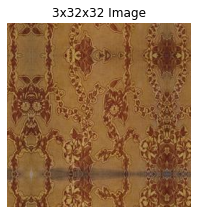

In [9]:
# Prepare data loaders for training using the loaded data and specified loader parameters
loaders = torch_utils.preparation.prepare_data_loaders(data, **cfg["model"]["loader_params"])

# Extract the example image with shape (3, 32, 32)
example_index = 0  # You can change this to view different examples
#original_one_hot_label = data['train_y'][example_index]

# Print the shape of the example image (optional)
#print("Shape of the printable image:", example_image_3x32x32.shape)

# Display the 3x32x32 image
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(data['train_x'][example_index].transpose(1,2,0))  # Display as (32, 32, 3)
plt.title("3x32x32 Image")
plt.axis('off')

# Show both displayed images
plt.tight_layout()
plt.show()

In [10]:
data["train_x"].shape

(9, 3, 256, 256)

### Model parameters
This code snippet manages the configuration and initialization of the neural network model:

The first line updates the "in_channels" value in the model configuration. This update ensures that the number of input channels matches the number of channels in the training images. It aligns the model's input layer with the image data's channel dimension.

The second line updates the "out_features" value in the model configuration. This update ensures that the number of output features (classes) matches the number of classes in the training labels. It ensures the model's output layer aligns with the classes in the data.

In [11]:
# Update the number of input channels in the model configuration based on the number of channels in the training data
cfg["model"]["encoder"]["in_channels"] = cfg["model"]["decoder"]["in_channels"] = data["train_x"].shape[1]

# Update the number of output features (classes) in the model configuration based on the number of features in the training labels
cfg["model"]["encoder"]["out_features"] = cfg["model"]["decoder"]["out_features"] = data["train_y"].shape[1] + cfg["model.embedding_size"]

for example_img, example_concepts, in loaders['train']: break

encoder_module = torch_utils.model.get_torchvision_model(**cfg["model.encoder"])
decoder_module = torch_utils.model.get_torchvision_model_as_decoder(example_img[:1], **cfg["model.decoder"]) #creates sort of an inverted model

In [12]:
model_params = cfg["model"].copy()
model_params["encoder"] = encoder_module
model_params["decoder"] = decoder_module
main_module = utils.TextAIle(**model_params)

In [13]:
# If we want to visualize the complete structure
main_module

TextAIle(
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [14]:
# # If we want to visualize shapes per layer
# # inp = example_img[:1] #encoder_module(example_img[:1])
# # print("ENCODER")
# # for layer_name, layer in encoder_module.named_children():
# #     print(layer_name, layer)
# #     inp = layer(inp)
# #     print(inp.shape)
# # print(inp.shape)

# inp = encoder_module(example_img[:1])

# print("DECODER")
# for layer_name, layer in decoder_module.named_children():
#     print(layer_name, layer)
#     inp = layer(inp)
#     print(inp.shape)
# print(inp.shape)

In [15]:
# # Visualize original image, reconstructed image, true and predicted concepts
# example_rec_img, example_pred_concepts, example_emb = main_module(example_img)
# fig, ax = plt.subplots(len(example_img), 4, figsize=(12, 3 * len(example_img)))
# for i, (img, rec_img, true_concepts, pred_concepts) in enumerate(zip(example_img, example_rec_img, example_concepts, example_pred_concepts)):
#     ax[i, 0].imshow(img.detach().cpu().numpy().transpose(1,2,0), )
#     ax[i, 0].set_title("Original")
#     ax[i, 1].imshow(rec_img.detach().cpu().numpy().transpose(1,2,0))
#     ax[i, 1].set_title("Reconstructed")
#     ax[i, 2].bar(np.arange(len(true_concepts)), true_concepts.detach().cpu().numpy())
#     ax[i, 2].set_title("True Concepts")
#     ax[i, 3].bar(np.arange(len(pred_concepts)), pred_concepts.detach().cpu().numpy())
#     ax[i, 3].set_title("Predicted Concepts")
# # !!! HERE THE MODEL IS NOT TRAINED YET, SO THE PREDICTION IS RANDOM !!!

In [16]:
main_module

TextAIle(
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

### Get experiment ID

Check if experiment has already been done, if so, load its ID

In [17]:
exp_found, experiment_id = exp_utils.exp.get_experiment_id(cfg)
print("Experiment already found:", exp_found, "----> The experiment id is:", experiment_id)

Experiment already found: True ----> The experiment id is: D5J8aOi36lPeg9HD


## Load model

In [18]:
model_path = os.path.join(out_folder, "models", cfg["__exp__.name"], experiment_id, "last.ckpt")
model = torch_utils.process.load_model(cfg["model"], model_path, main_module=main_module, map_location=torch.device('cpu'), strict=False)

# Visualize results

train


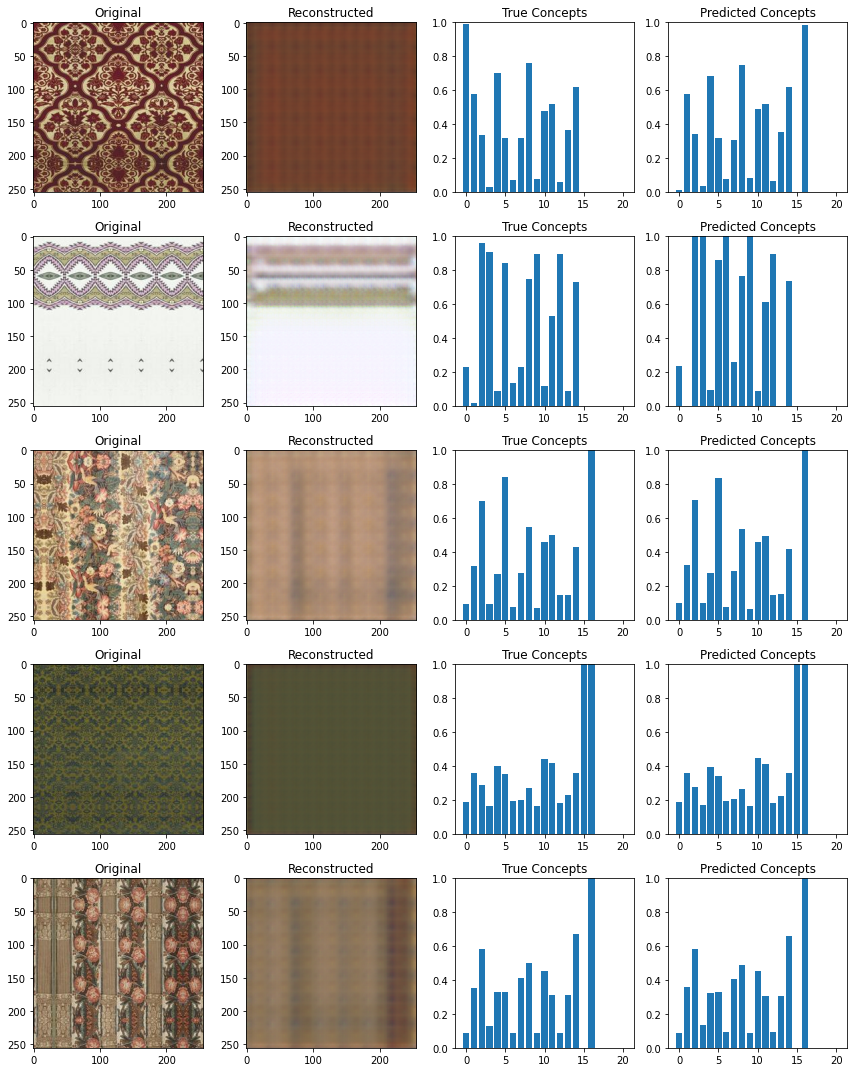

val


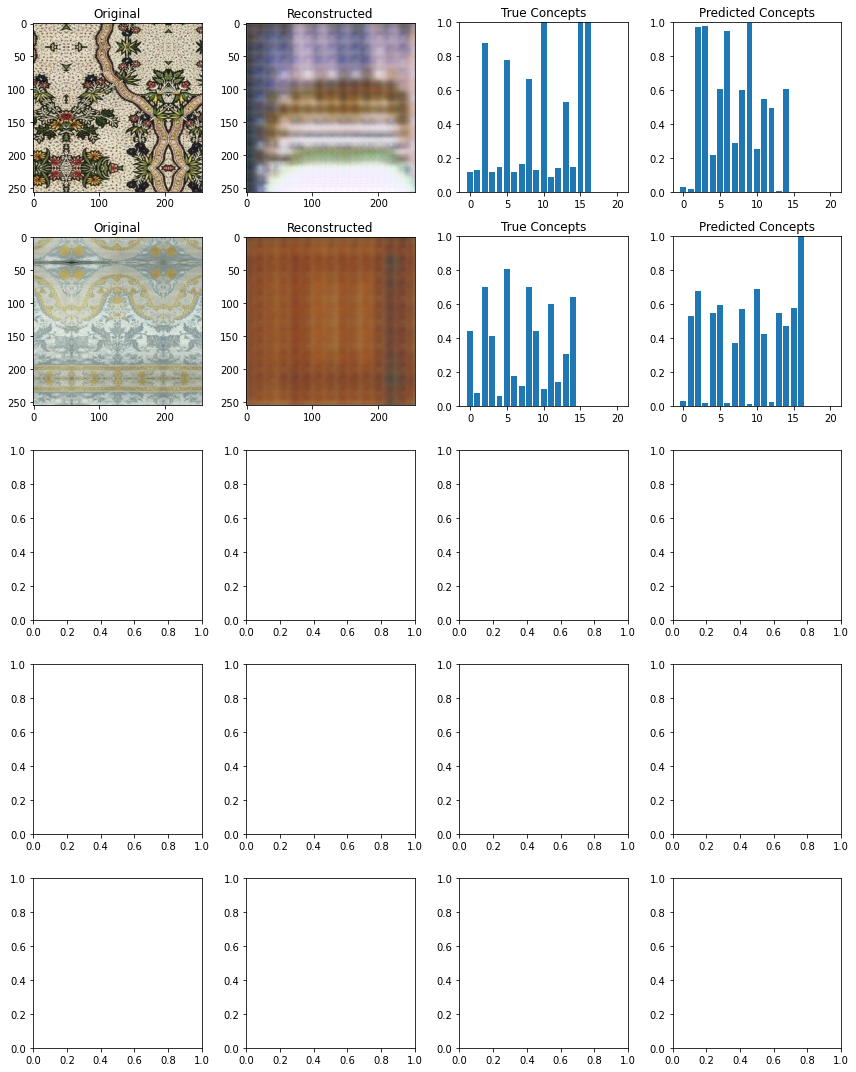

test


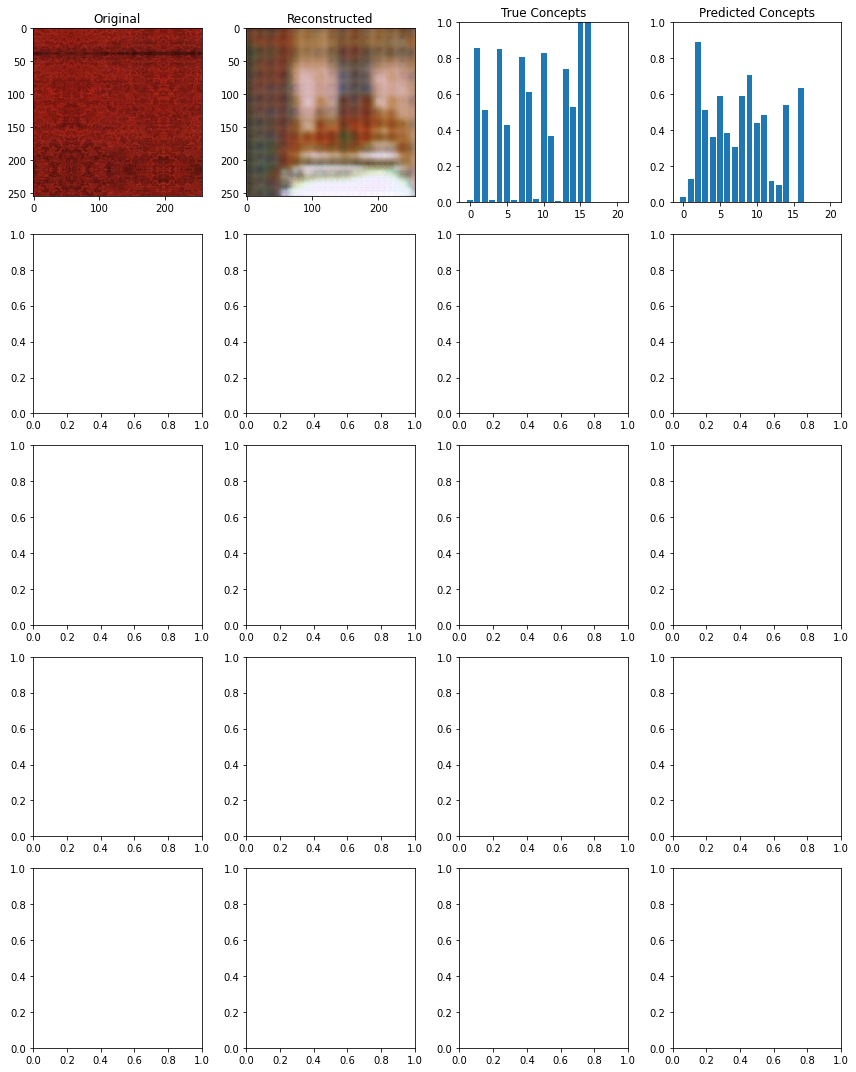

In [19]:
# Visualize original image, reconstructed image, true and predicted concepts
num_to_show = 5
for split_name, split_loader in loaders.items():
    print(split_name)
    for img, true_concepts in split_loader:
        fig, ax = plt.subplots(num_to_show, 4, figsize=(12, 3 * num_to_show))
        out = model(img)
        rec_img, pred_concepts, emb = out["reconstructed_img"], out["concepts"], out["embedding"]
        for i, (img, rec_img, true_concepts, pred_concepts) in enumerate(zip(img, rec_img, true_concepts, pred_concepts)):
            ax[i, 0].imshow(img.detach().cpu().numpy().transpose(1,2,0))
            ax[i, 0].set_title("Original")
            ax[i, 1].imshow(rec_img.detach().cpu().numpy().transpose(1,2,0))
            ax[i, 1].set_title("Reconstructed")
            ax[i, 2].bar(np.arange(len(true_concepts)), true_concepts.detach().cpu().numpy())
            ax[i, 2].set_title("True Concepts")
            ax[i, 2].set_ylim([0, 1])
            ax[i, 3].bar(np.arange(len(pred_concepts)), pred_concepts.detach().cpu().numpy())
            ax[i, 3].set_title("Predicted Concepts")
            ax[i, 3].set_ylim([0, 1])
            if i == num_to_show - 1: break
        plt.tight_layout()
        plt.show()
        break

In [20]:
# Punti random nello spazio

embedding_space_size = cfg["model"]["encoder"]["out_features"]

# Generate random points in the embedding space
num_points = 10
random_points = torch.rand(num_points, embedding_space_size)

# Use decoder to generate images from random points
random_points = random_points.to(model.device)

# Generate images from random points
generated_images = main_module.decode(random_points)["reconstructed_img"]

# Get concepts from generated images
generated_concepts = main_module.encode(generated_images)["concepts"].detach().cpu().numpy()

generated_images = generated_images.detach().cpu().numpy()

In [21]:
# Punti random nello spazio ma con concetti originali

embedding_space_size = cfg["model"]["encoder"]["out_features"]

# Get some true concepts
for img, true_concepts in loaders["test"]: break
true_concepts[torch.isnan(true_concepts)] = 0

# Get generated embeddings
gen_embeddings = main_module.encode(img)["embedding"]

# Generate random points in the embedding space
num_points = 10
random_points = torch.cat([true_concepts[:num_points],gen_embeddings[:num_points]],dim=-1)

# Use decoder to generate images from random points
random_points = random_points.to(model.device)

# Generate images from random points
generated_images = main_module.decode(random_points)

# Get concepts from generated images
generated_concepts = main_module.encode(generated_images)[0].detach().cpu().numpy()

generated_images = generated_images.detach().cpu().numpy()

TypeError: conv2d() received an invalid combination of arguments - got (dict, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!dict!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!dict!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)


In [ ]:
main_module.encode(img)

{'embedding': tensor([[-6.8107e-01, -1.0050e-01,  1.2893e+00, -3.9552e+00,  4.8438e-02,
          -1.7448e+00,  8.2674e-01,  1.9442e+00,  1.2585e+00, -1.7012e+00,
           9.7329e-01,  8.1917e-01,  7.1690e-02, -1.6738e+00,  1.3478e-01,
           9.2066e-01, -2.0529e-01,  1.0941e+00,  1.0582e+00, -2.1098e+00,
          -1.8011e+00,  3.5752e-01, -7.5343e-01,  6.4722e-01,  4.7324e-01,
           9.2517e-01, -6.8239e-01,  1.6243e+00,  3.5910e-01, -1.5890e+00,
           1.3925e+00,  1.3610e+00,  5.5391e-02, -1.0959e+00, -2.3811e-01,
           1.6966e-01,  5.8471e-02,  1.3105e+00,  1.6110e+00, -8.4891e-01,
           1.1503e+00,  1.4959e-01, -1.2129e+00, -1.4085e-01, -2.7957e-01,
          -1.1243e-01, -1.4921e+00,  2.1290e-01,  4.7717e-01,  1.8542e-01,
           9.1396e-01, -7.1849e-01,  1.0253e+00, -9.0437e-01,  2.7138e-01,
          -6.2003e-01, -1.7573e+00, -7.6550e-02,  9.4856e-01, -8.6670e-01,
          -1.8851e+00, -7.9245e-02, -2.6176e-01,  1.3109e+00, -1.7960e+00,
           1

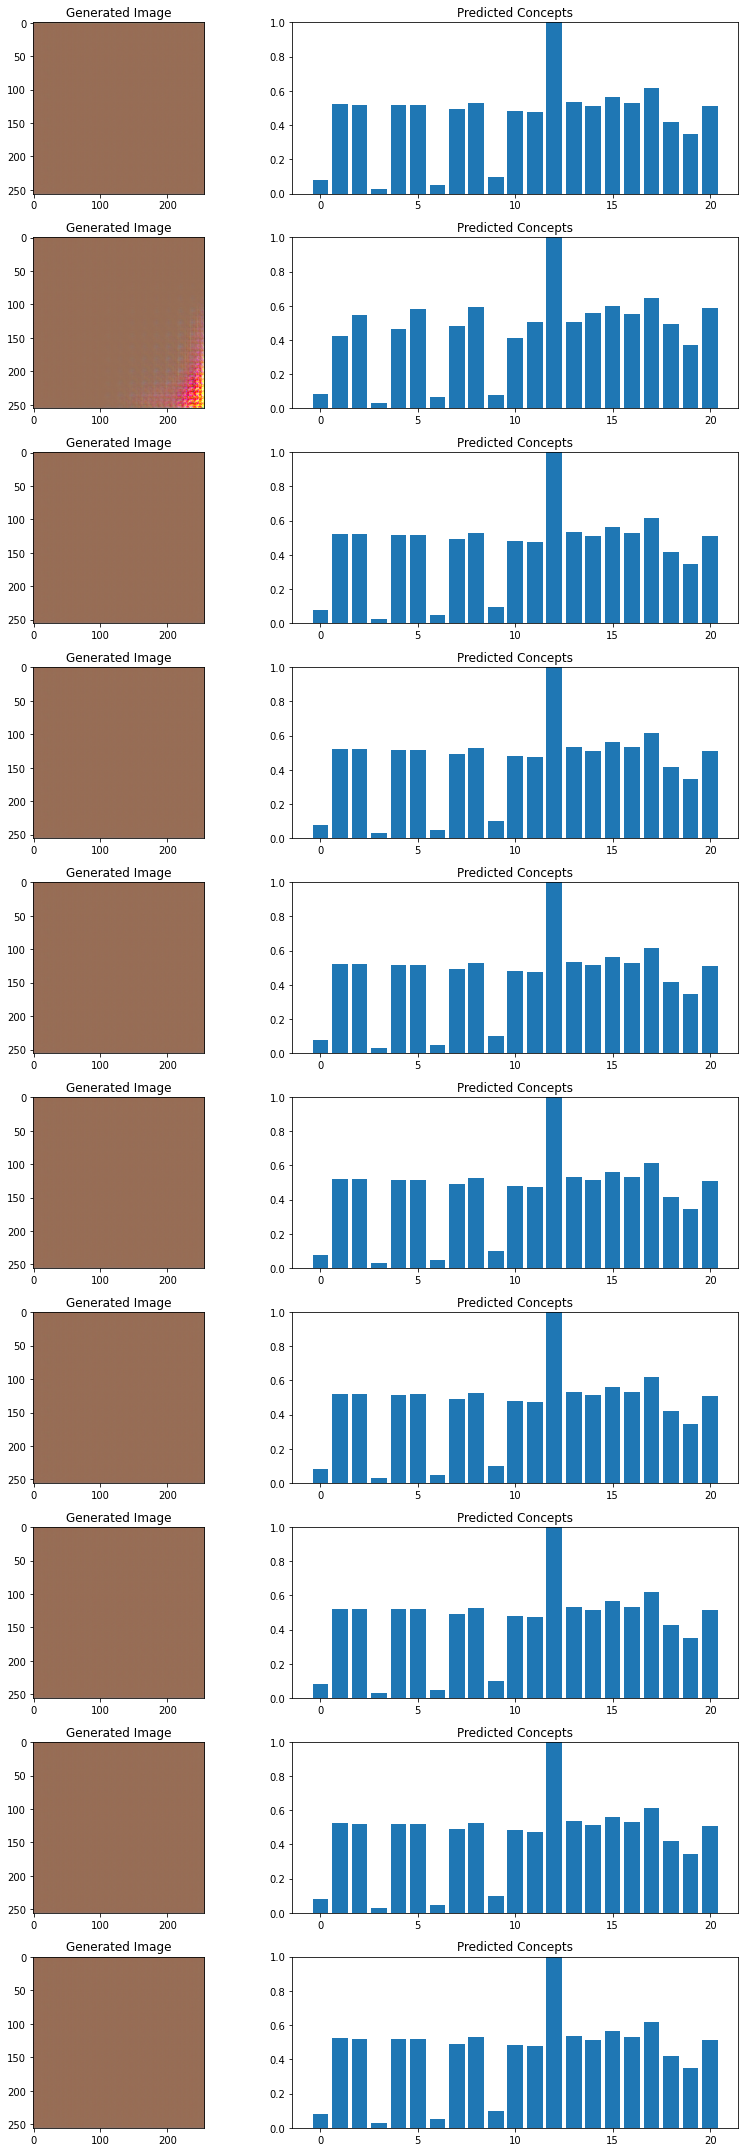

In [ ]:
# Visualize generated images
num_to_show = 10
fig, ax = plt.subplots(num_to_show, 2, figsize=(12, 3 * num_to_show))
for i,(img,pred_concepts) in enumerate(zip(generated_images, generated_concepts)):
    ax[i, 0].imshow(img.transpose(1,2,0))
    ax[i, 0].set_title("Generated Image")
    ax[i, 1].bar(np.arange(len(pred_concepts)), pred_concepts)
    ax[i, 1].set_title("Predicted Concepts")
    ax[i, 1].set_ylim([0, 1])
    if i == num_to_show - 1: break
plt.tight_layout()
plt.show()

In [ ]:
# # Concetto da cambiare e valore del concetto nuovo
# pred_concepts, emb

# new_concepts = true_concepts[0][indice_concetto] = valore_concetto
# new_concepts = pred_concepts[0][indice_concetto] = valore_concetto


# new_img = decoder(torch.cat([new_concepts,emb],dim=1))

# plt.imshow(new_img[0].detach().cpu().numpy().transpose(1,2,0))
# plt.show()


# new_img --> LS_function(...) --> true_new_concepts

# # Confronto true_new_concepts con new_concepts
# # Vedere se sono rimasti uguali tranne quello che volevamo cambiare

# # Hue è strano da valutare, difficile da capire se è esattamente corretto


# # Evaluation:
# # Modificare l'immagine: img orig, embedding, cambi leggeremente il concetto, vedi se lo cambia davvero

# # Generare immagini: dare direttamente i concetti, random embedding --> vedere se generato ha senso
# # random embedding? --> embedding che ha senso?



In [ ]:
##concetti